In [314]:
# Standard DS imports
import pandas as pd
import numpy as np

# Vizualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# NLP imports
import re
import unicodedata
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from wordcloud import WordCloud

# Custom imports
import acquire as a
import env

import os
import requests
import random

## Acquire

In [315]:
df = a.process_all_repos()

In [316]:
df.head()

Unnamed: 0                                      repo language  \
0           0          /facebookresearch/ResponsibleNLP   Python   
1           1       /facebookresearch/projectaria_tools      C++   
2           2   /facebookresearch/HolisticTraceAnalysis   Python   
3           3                /facebookresearch/fairseq2   Python   
4           4  /facebookresearch/seamless_communication   Python   

                                     readme_contents  
0  This repository hosts code and datasets relati...  
1  # Project Aria Tools

Project Aria Tools is a ...  
2  [![CircleCI](https://circleci.com/gh/facebookr...  
3  <p align="center">
  <img src="doc/static/img/...  
4  ![](seamlessM4T.png)
# SeamlessM4T
SeamlessM4T...

## Prepare

##### Prepare Steps:
- Lowercase All Text
- Remove accented characters and non-ASCII characters
- Remove special characters
- Tokenize
- Lemmatize
- Remove Stopwords
- Add extra Stopwords

In [317]:
df = a.transform_data(df, extra_stopwords=extra_stopwords)

In [318]:
df.head()

Unnamed: 0                                      repo language  \
0           0          /facebookresearch/ResponsibleNLP   Python   
1           1       /facebookresearch/projectaria_tools      C++   
2           2   /facebookresearch/HolisticTraceAnalysis   Python   
3           3                /facebookresearch/fairseq2   Python   
4           4  /facebookresearch/seamless_communication   Python   

                                            original  \
0  This repository hosts code and datasets relati...   
1  # Project Aria Tools

Project Aria Tools is a ...   
2  [![CircleCI](https://circleci.com/gh/facebookr...   
3  <p align="center">
  <img src="doc/static/img/...   
4  ![](seamlessM4T.png)
# SeamlessM4T
SeamlessM4T...   

                                               clean  \
0  repository hosts code datasets relating respon...   
1  project aria tools project aria tools suite c ...   
2  circlecihttps circlecicom gh facebookresearch ...   
3  p aligncenter img srcdoc static img logopng wi...   
4  seamlessm4tpng seamlessm4t seamlessm4t designe...   

                                           lematized  
0  repository host code datasets relating respons...  
1  project aria tool project aria tool suite c py...  
2  circlecihttps circlecicom gh appcirclecicom pi...  
3  p aligncenter img srcdoc static img logopng wi...  
4  seamlessm4tpng seamlessm4t seamlessm4t designe...

## Explore

In [319]:
py_words = ' '.join(df[df.language == 'Python'].lematized)
c_words = ' '.join(df[df.language == 'C++'].lematized)
mark_words = ' '.join(df[df.language == 'Markdown'].lematized)
other_words = ' '.join(df[df.language == 'Other'].lematized)
all_words = ' '.join(df.lematized)

In [320]:
# Get word counts for each language
py_counts =pd.Series(py_words.split()).value_counts()
c_counts =pd.Series(c_words.split()).value_counts()
mark_counts =pd.Series(mark_words.split()).value_counts()
other_counts =pd.Series(other_words.split()).value_counts()
all_counts =pd.Series(all_words.split()).value_counts()

In [321]:
py_counts.sum()

375592

In [322]:
all_counts

model          6279
data           3749
python         3643
file           3084
training       2828
               ... 
597               1
921               1
runsquadsh        1
gluedataset       1
openreview        1
Name: count, Length: 46822, dtype: int64

In [323]:
# Get word frequencies for each language
py_freq =pd.Series(py_words.split()).value_counts(normalize=True)* 100
c_freq = pd.Series(c_words.split()).value_counts(normalize=True)* 100
mark_freq = pd.Series(mark_words.split()).value_counts(normalize=True)* 100
other_freq = pd.Series(other_words.split()).value_counts(normalize=True)* 100
all_freq = pd.Series(all_words.split()).value_counts(normalize=True)* 100

In [324]:
# What are the most frequent py words?
py_counts.head(20)

model       5455
python      3154
data        3092
training    2523
file        2436
run         2217
code        2040
use         1949
1           1926
dataset     1762
install     1758
using       1389
example     1384
script      1351
train       1339
image       1277
bash        1232
paper       1231
task        1209
path        1201
Name: count, dtype: int64

In [325]:
# What are the most frequent c words?
c_counts.head(20)

install     146
build       141
example     138
model       138
1           121
file        116
use         115
python      109
run         107
x           101
data        101
c           100
game         92
see          90
habitat      84
cd           76
training     74
0            74
2            72
bash         71
Name: count, dtype: int64

In [326]:
# What are the most frequent Markdown words?
mark_counts.head(20)

data           144
dataset        122
file           117
contains        83
participant     74
directory       65
session         50
1               49
model           48
audio           47
language        44
frame           42
video           41
microphone      38
pose            38
paper           38
used            35
system          34
user            33
camera          33
Name: count, dtype: int64

<div class="alert alert-block alert-info"> 
<b>Takeaway:</b>
    
- Words like 
- Words like 
</div>

In [327]:
all_counts

model          6279
data           3749
python         3643
file           3084
training       2828
               ... 
597               1
921               1
runsquadsh        1
gluedataset       1
openreview        1
Name: count, Length: 46822, dtype: int64

In [328]:
#Combine the value counts into one dataframe
word_counts = pd.concat([py_counts, c_counts, mark_counts,other_counts, all_counts], axis=1)
word_counts.columns = ['py_counts', 'c_counts', 'mark_counts','other_counts', 'all_counts']

# Fill the nulls with 0
word_counts.fillna(0, inplace=True)
#Recast all columns as integers
word_counts = word_counts.astype('int')

#take a look
word_counts.head()

py_counts  c_counts  mark_counts  other_counts  all_counts
model          5455       138           48           638        6279
python         3154       109            6           374        3643
data           3092       101          144           412        3749
training       2523        74           19           212        2828
file           2436       116          117           415        3084

In [329]:
#Combine the value counts into one dataframe
word_freq = pd.concat([py_freq, c_freq, mark_freq, other_freq, all_freq], axis=1)
word_freq.columns = ['py_freq', 'c_freq', 'mark_freq','other_freq', 'all_freq']

# Fill the nulls with 0
word_freq.fillna(0, inplace=True)

#take a look
word_freq.head()

py_freq    c_freq  mark_freq  other_freq  all_freq
model     1.452374  0.667408   0.531150    0.994715  1.337537
python    0.839741  0.527156   0.066394    0.583109  0.776023
data      0.823234  0.488465   1.593449    0.642355  0.798603
training  0.671740  0.357886   0.210247    0.330532  0.602413
file      0.648576  0.561010   1.294677    0.647032  0.656946

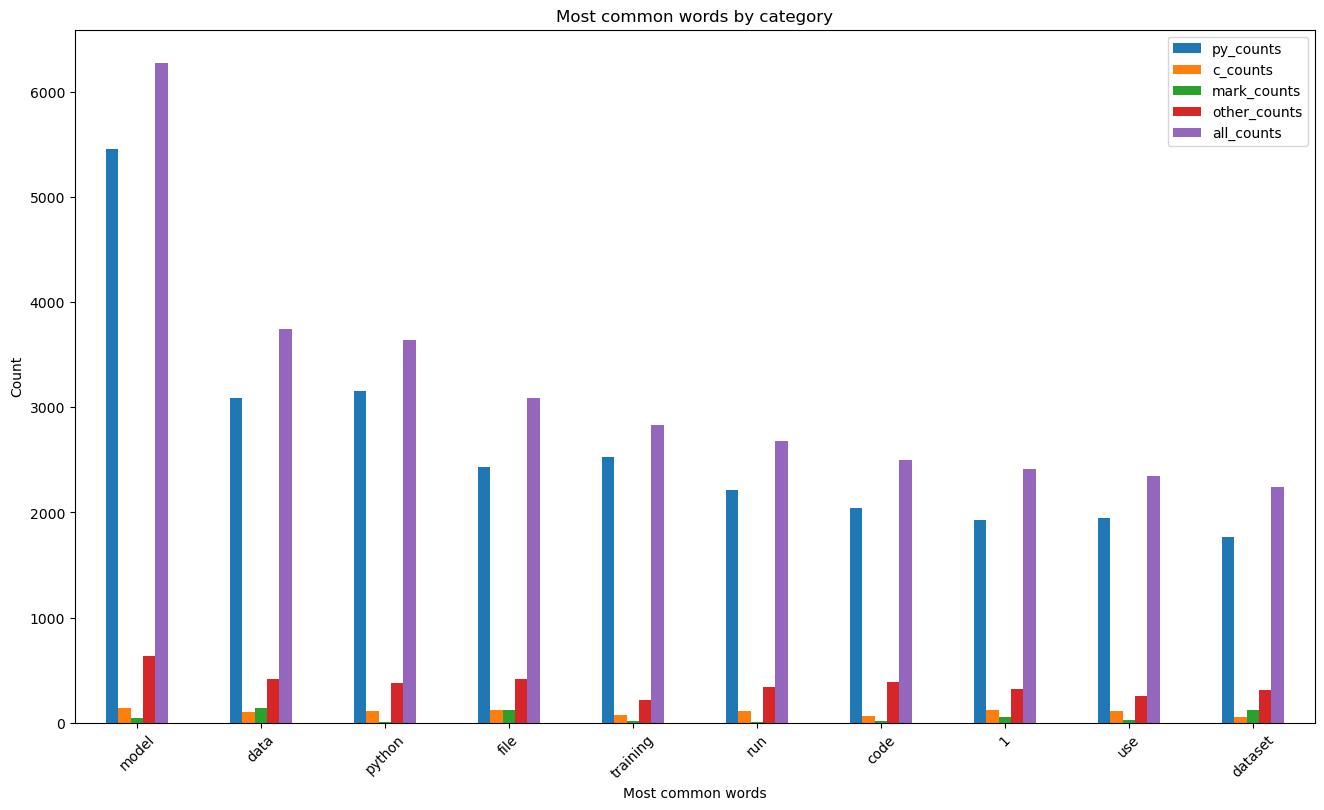

In [330]:
#Plot the most frequent words and color by label
word_counts.sort_values('all_counts', ascending=False).head(10).plot.bar(figsize=(16, 9))
plt.title('Most common words by category')
plt.ylabel('Count')
plt.xlabel('Most common words')
plt.xticks(rotation=45)
plt.show()

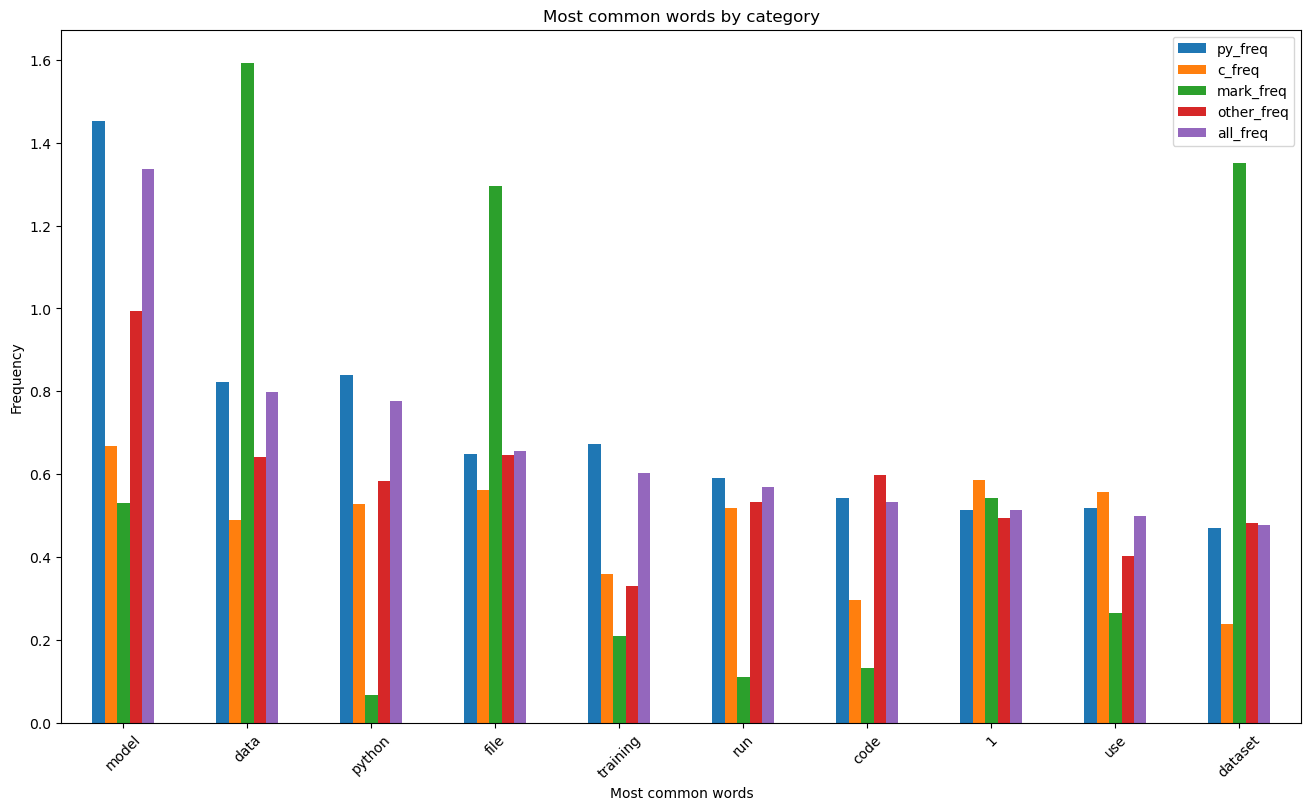

In [331]:
#Plot the most frequent words and color by label
word_freq.sort_values('all_freq', ascending=False).head(10).plot.bar(figsize=(16, 9))
plt.title('Most common words by category')
plt.ylabel('Frequency')
plt.xlabel('Most common words')
plt.xticks(rotation=45)
plt.show()

In [332]:
# Create dataframe with the word counts and frequencies for each language
words = pd.concat([word_counts, word_freq], axis=1)

In [333]:
# Look at the highest percent python words
words.sort_values('py_freq', ascending=False).head(10)

py_counts  c_counts  mark_counts  other_counts  all_counts  \
model          5455       138           48           638        6279   
python         3154       109            6           374        3643   
data           3092       101          144           412        3749   
training       2523        74           19           212        2828   
file           2436       116          117           415        3084   
run            2217       107           10           341        2675   
code           2040        61           12           383        2496   
use            1949       115           24           258        2346   
1              1926       121           49           317        2413   
dataset        1762        49          122           309        2242   

           py_freq    c_freq  mark_freq  other_freq  all_freq  
model     1.452374  0.667408   0.531150    0.994715  1.337537  
python    0.839741  0.527156   0.066394    0.583109  0.776023  
data      0.823234  0.488465   1.593449    0.642355  0.798603  
training  0.671740  0.357886   0.210247    0.330532  0.602413  
file      0.648576  0.561010   1.294677    0.647032  0.656946  
run       0.590268  0.517483   0.110656    0.531658  0.569822  
code      0.543143  0.295014   0.132787    0.597141  0.531692  
use       0.518914  0.556174   0.265575    0.402251  0.499739  
1         0.512790  0.585191   0.542215    0.494239  0.514011  
dataset   0.469126  0.236978   1.350006    0.481766  0.477585

In [334]:
# Look at the highest percent c words
words.sort_values('c_freq', ascending=False).head(10)

py_counts  c_counts  mark_counts  other_counts  all_counts   py_freq  \
install       1758       146            7           324        2235  0.468061   
build          225       141            4           136         506  0.059905   
example       1384       138           10           249        1781  0.368485   
model         5455       138           48           638        6279  1.452374   
1             1926       121           49           317        2413  0.512790   
file          2436       116          117           415        3084  0.648576   
use           1949       115           24           258        2346  0.518914   
python        3154       109            6           374        3643  0.839741   
run           2217       107           10           341        2675  0.590268   
x              230       101            9            72         412  0.061237   

           c_freq  mark_freq  other_freq  all_freq  
install  0.706099   0.077459    0.505153  0.476094  
build    0.681917   0.044262    0.212039  0.107787  
example  0.667408   0.110656    0.388219  0.379384  
model    0.667408   0.531150    0.994715  1.337537  
1        0.585191   0.542215    0.494239  0.514011  
file     0.561010   1.294677    0.647032  0.656946  
use      0.556174   0.265575    0.402251  0.499739  
python   0.527156   0.066394    0.583109  0.776023  
run      0.517483   0.110656    0.531658  0.569822  
x        0.488465   0.099591    0.112256  0.087763

In [335]:
# Look at the highest percent markdown words
words.sort_values('mark_freq', ascending=False).head(10)

py_counts  c_counts  mark_counts  other_counts  all_counts  \
data              3092       101          144           412        3749   
dataset           1762        49          122           309        2242   
file              2436       116          117           415        3084   
contains           539        30           83           139         791   
participant         22         0           74            12         108   
directory          660        24           65           105         854   
session             33         0           50             3          86   
1                 1926       121           49           317        2413   
model             5455       138           48           638        6279   
audio              267        11           47            62         387   

              py_freq    c_freq  mark_freq  other_freq  all_freq  
data         0.823234  0.488465   1.593449    0.642355  0.798603  
dataset      0.469126  0.236978   1.350006    0.481766  0.477585  
file         0.648576  0.561010   1.294677    0.647032  0.656946  
contains     0.143507  0.145089   0.918446    0.216717  0.168497  
participant  0.005857  0.000000   0.818856    0.018709  0.023006  
directory    0.175723  0.116071   0.719265    0.163707  0.181917  
session      0.008786  0.000000   0.553281    0.004677  0.018320  
1            0.512790  0.585191   0.542215    0.494239  0.514011  
model        1.452374  0.667408   0.531150    0.994715  1.337537  
audio        0.071088  0.053199   0.520084    0.096665  0.082438

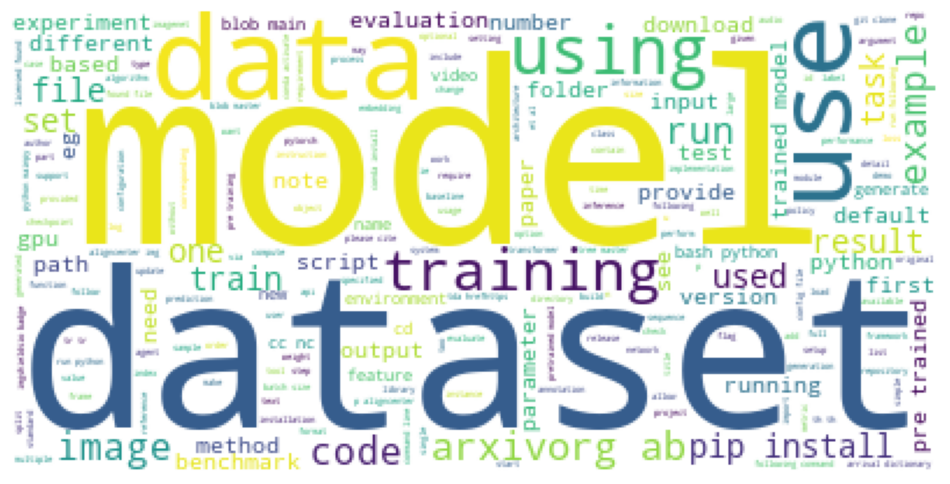

In [336]:
# Word Cloud for All words
all_cloud = WordCloud(background_color='white').generate(all_words)
plt.figure(figsize=(12, 8))
plt.imshow(all_cloud)
plt.axis('off')
plt.show()

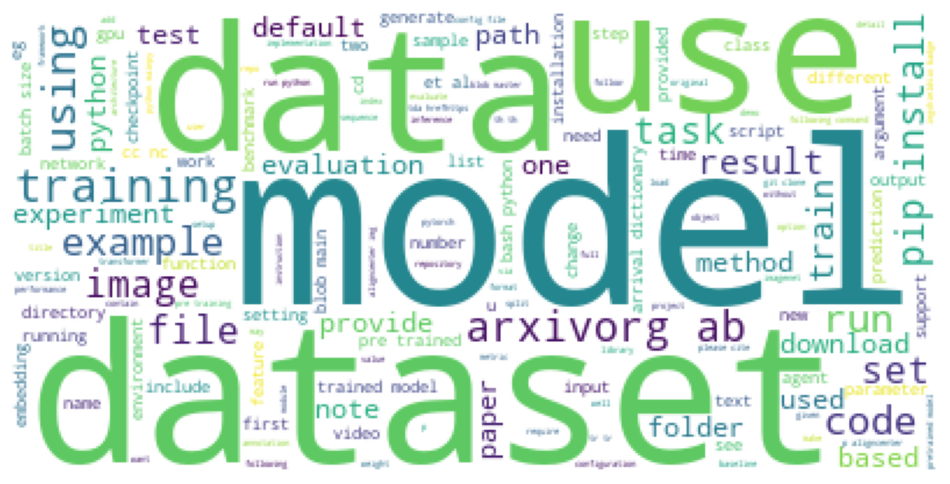

In [337]:
# Word Cloud for Python words
py_cloud = WordCloud(background_color='white').generate(py_words)
plt.figure(figsize=(12, 8))
plt.imshow(py_cloud)
plt.axis('off')
plt.show()


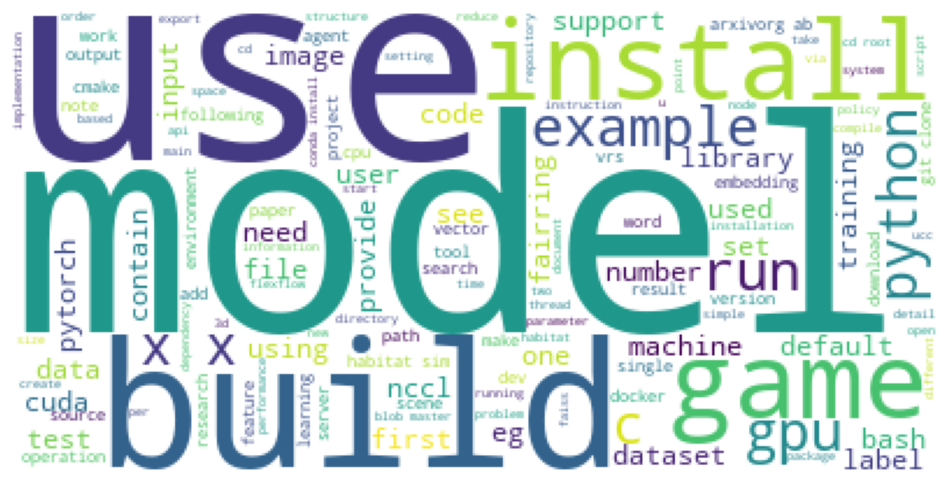

In [338]:
# Word Cloud for C words
c_cloud = WordCloud(background_color='white').generate(c_words)
plt.figure(figsize=(12, 8))
plt.imshow(c_cloud)
plt.axis('off')
plt.show()

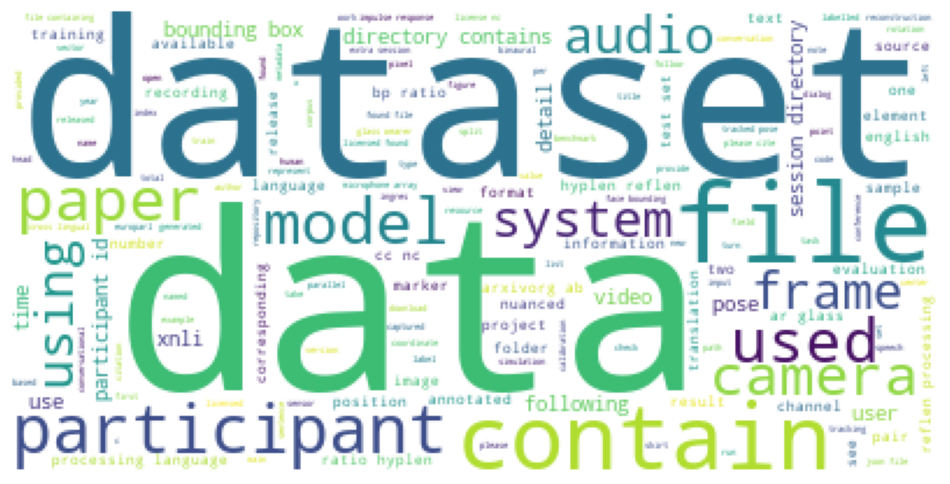

In [339]:
# Word Cloud for markdown words
mark_cloud = WordCloud(background_color='white').generate(mark_words)
plt.figure(figsize=(12, 8))
plt.imshow(mark_cloud)
plt.axis('off')
plt.show()

In [340]:
# Bigrams!
all_bigrams = (pd.Series(nltk.ngrams(all_words.split(), 2)))
py_bigrams = (pd.Series(nltk.ngrams(py_words.split(), 2)))
c_bigrams = (pd.Series(nltk.ngrams(c_words.split(), 2)))
mark_bigrams = (pd.Series(nltk.ngrams(mark_words.split(), 2)))

# Top 20 most common bigrams
top_20_all_bigrams = all_bigrams.value_counts().head(20)
top_20_py_bigrams = py_bigrams.value_counts().head(20)
top_20_c_bigrams = c_bigrams.value_counts().head(20)
top_20_mark_bigrams = mark_bigrams.value_counts().head(20)

In [341]:
word_freq.head()

py_freq    c_freq  mark_freq  other_freq  all_freq
model     1.452374  0.667408   0.531150    0.994715  1.337537
python    0.839741  0.527156   0.066394    0.583109  0.776023
data      0.823234  0.488465   1.593449    0.642355  0.798603
training  0.671740  0.357886   0.210247    0.330532  0.602413
file      0.648576  0.561010   1.294677    0.647032  0.656946

<Axes: >

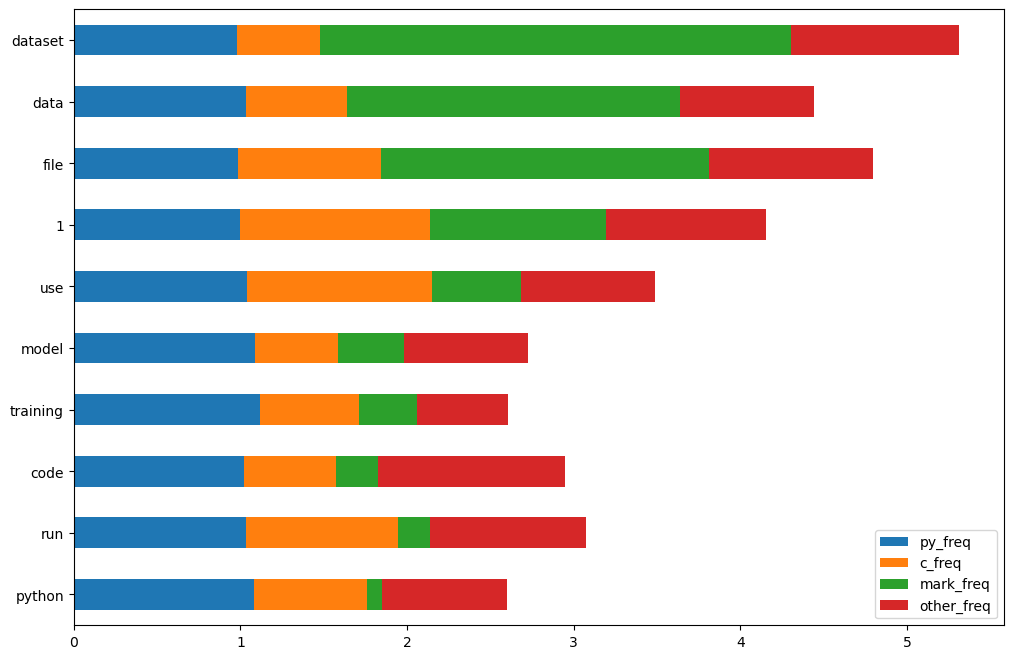

In [342]:
# Visualize language bigrams as percent of all word counts
(word_freq.sort_values(by='all_freq', ascending=False)
    .head(10)
    .apply(lambda row: row / row['all_freq'], axis=1)
    .drop(columns=['all_freq'])
    .sort_values(by='mark_freq')
    .plot.barh(stacked=True, figsize=(12, 8)))

In [343]:
# Trigrams!
all_trigrams = (pd.Series(nltk.ngrams(all_words.split(), 3)))
py_trigrams = (pd.Series(nltk.ngrams(py_words.split(), 3)))
c_trigrams = (pd.Series(nltk.ngrams(c_words.split(), 3)))
mark_trigrams = (pd.Series(nltk.ngrams(mark_words.split(), 3)))

# Top 20 most common trigrams
top_20_all_trigrams = all_trigrams.value_counts().head(20)
top_20_py_trigrams = py_trigrams.value_counts().head(20)
top_20_c_trigrams = c_trigrams.value_counts().head(20)
top_20_mark_trigrams = mark_trigrams.value_counts().head(20)

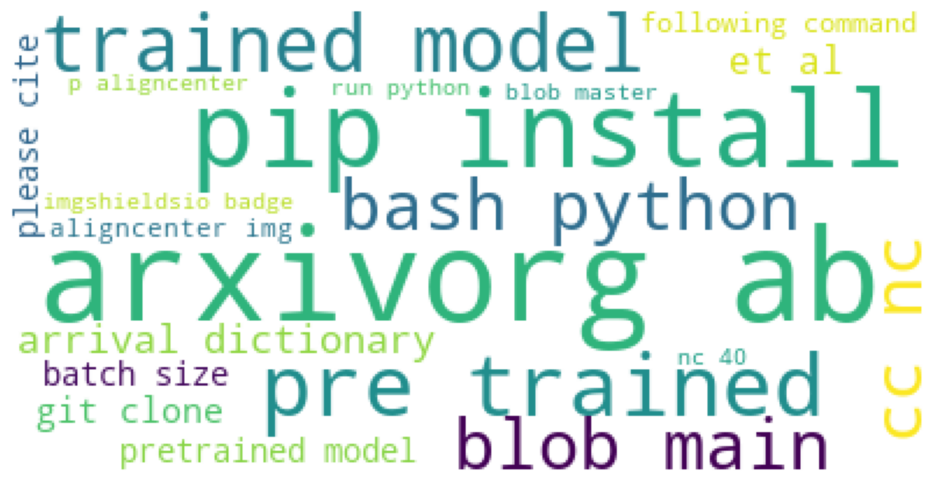

In [344]:
# Word Cloud for all bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_20_all_bigrams.to_dict().items()}
img = WordCloud(background_color='white').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

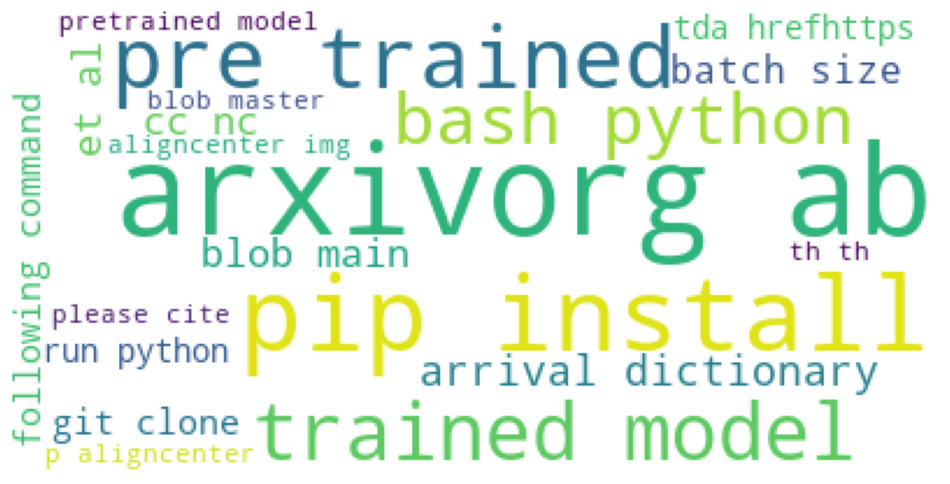

In [345]:
# Word Cloud for py bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_20_py_bigrams.to_dict().items()}
img = WordCloud(background_color='white').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

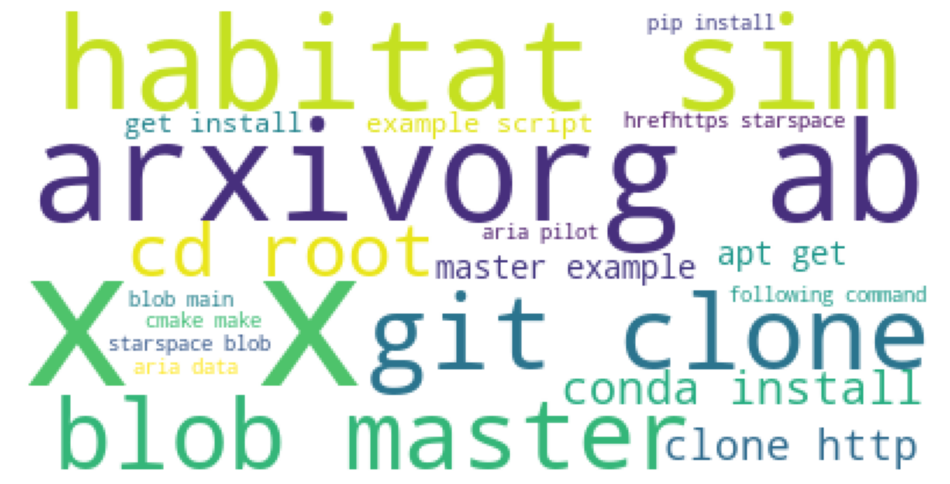

In [346]:
# Word Cloud for c bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_20_c_bigrams.to_dict().items()}
img = WordCloud(background_color='white').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

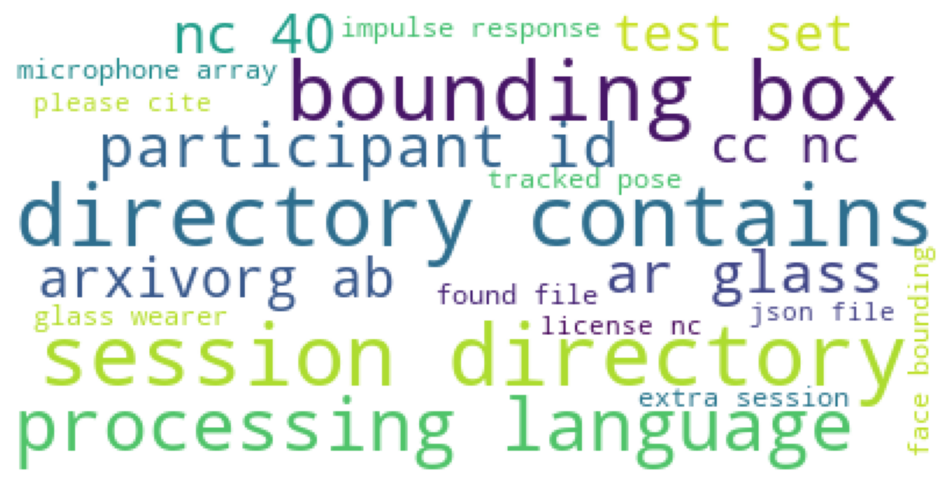

In [347]:
# Word Cloud for mark bigrams
data = {k[0] + ' ' + k[1]: v for k, v in top_20_mark_bigrams.to_dict().items()}
img = WordCloud(background_color='white').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

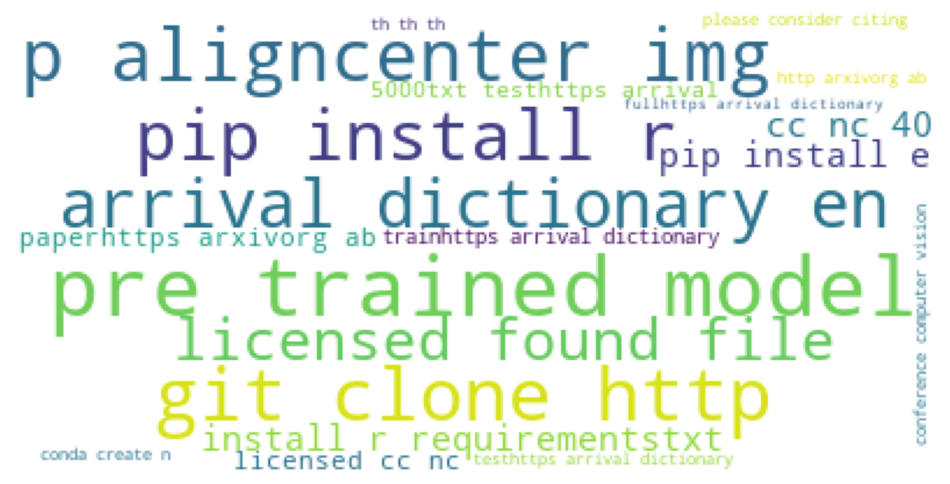

In [348]:
# Word Cloud for all trigrams
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_all_trigrams.to_dict().items()}
img = WordCloud(background_color='white').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

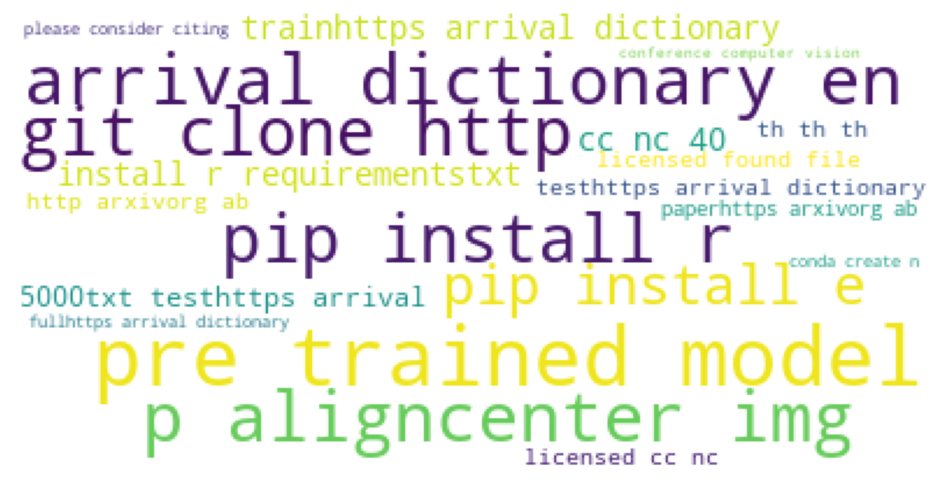

In [349]:
# Word Cloud for py trigrams
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_py_trigrams.to_dict().items()}
img = WordCloud(background_color='white').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

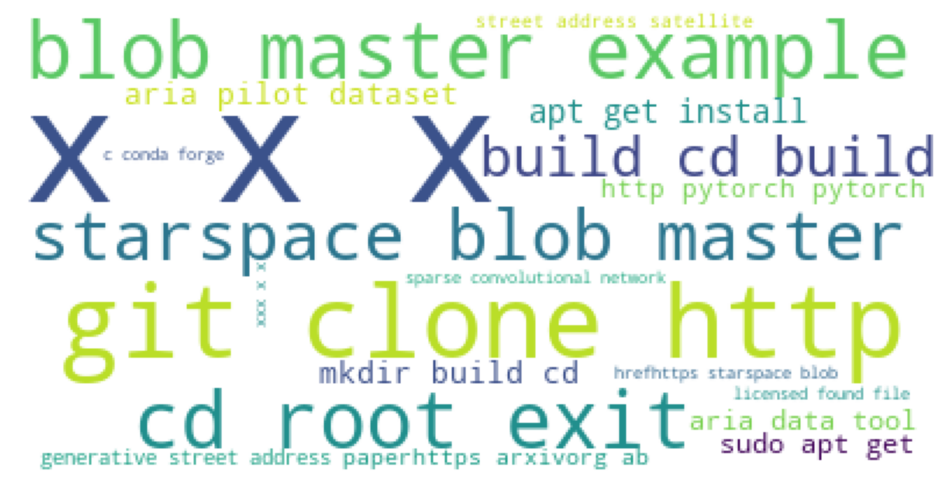

In [350]:
# Word Cloud for c trigrams
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_c_trigrams.to_dict().items()}
img = WordCloud(background_color='white').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

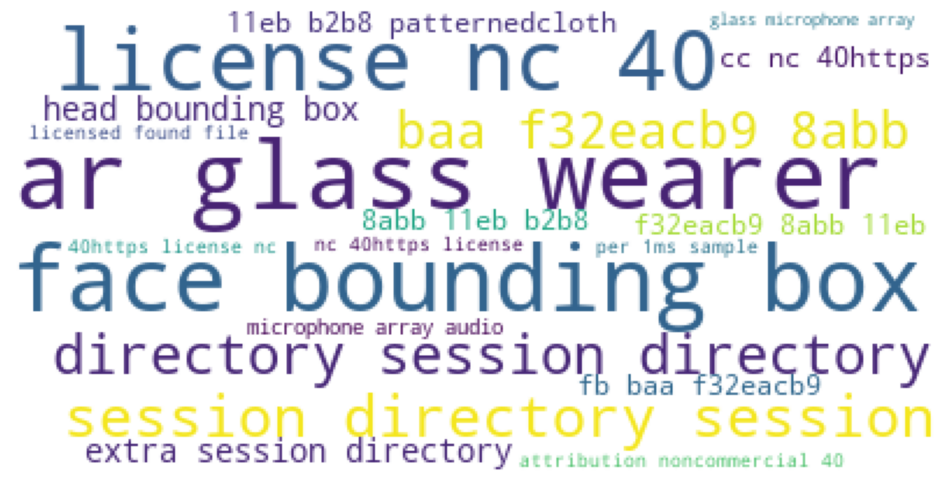

In [351]:
# Word Cloud for mark trigrams
data = {k[0] + ' ' + k[1] + ' ' + k[2]: v for k, v in top_20_mark_trigrams.to_dict().items()}
img = WordCloud(background_color='white').generate_from_frequencies(data)
plt.figure(figsize=(12, 8))
plt.imshow(img)
plt.axis('off')
plt.show()

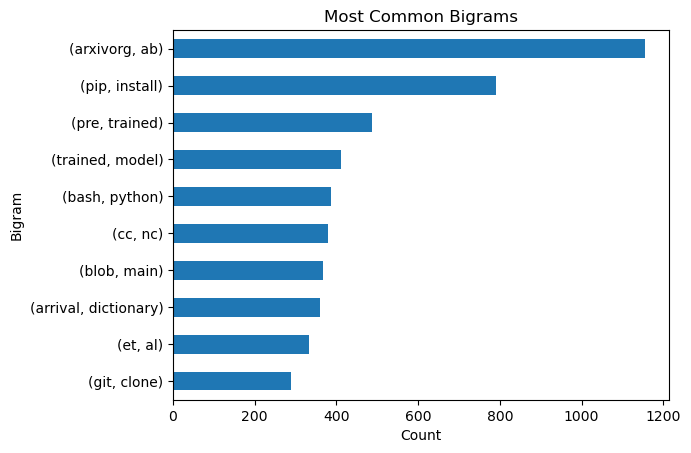

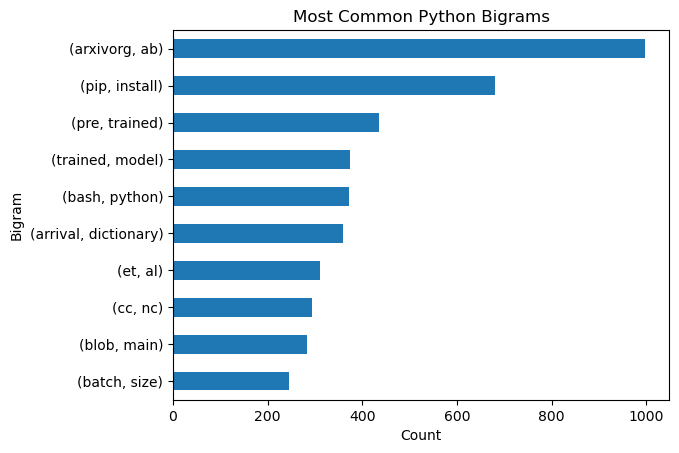

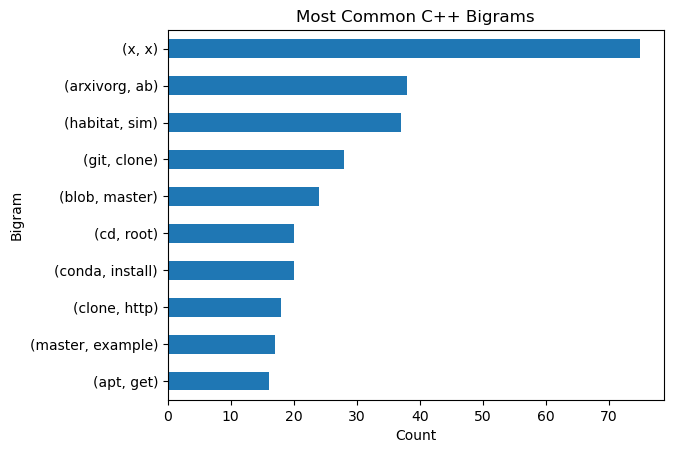

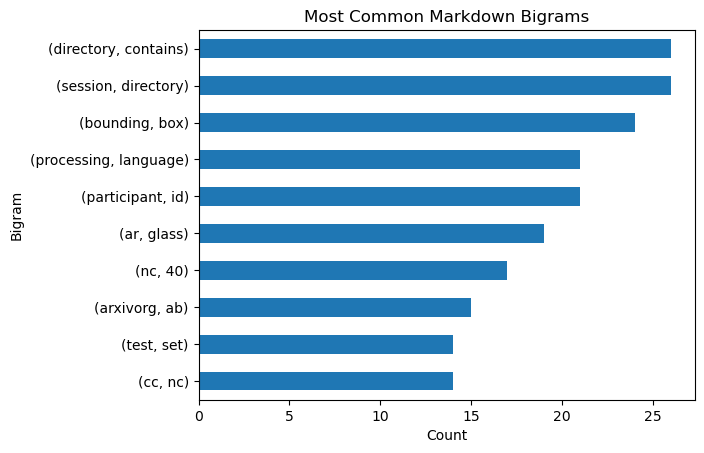

In [352]:
top_20_all_bigrams.head(10).plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most Common Bigrams')
plt.show()

top_20_py_bigrams.head(10).plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most Common Python Bigrams')
plt.show()

top_20_c_bigrams.head(10).plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most Common C++ Bigrams')
plt.show()

top_20_mark_bigrams.head(10).plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most Common Markdown Bigrams')
plt.show()

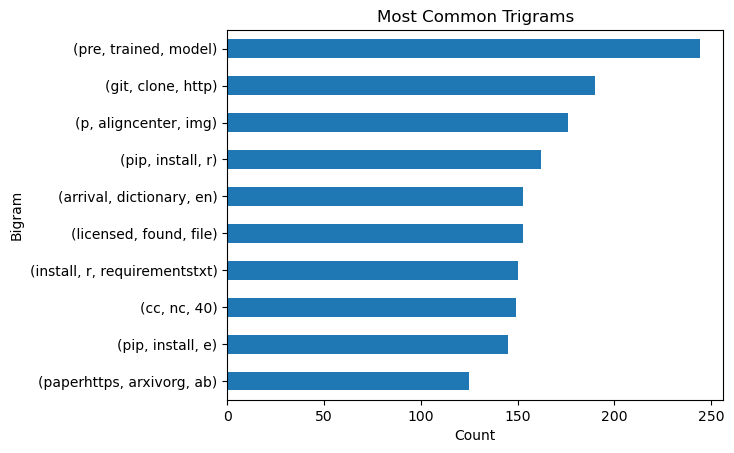

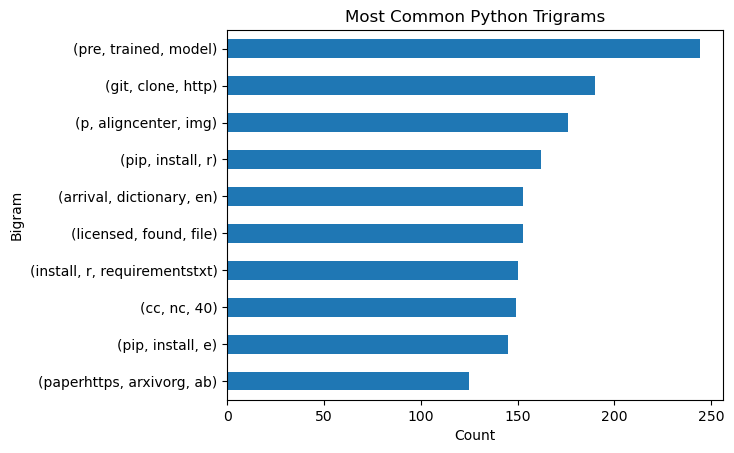

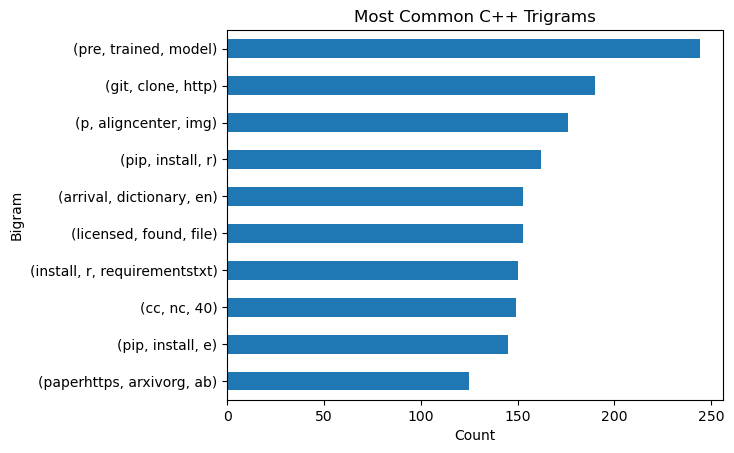

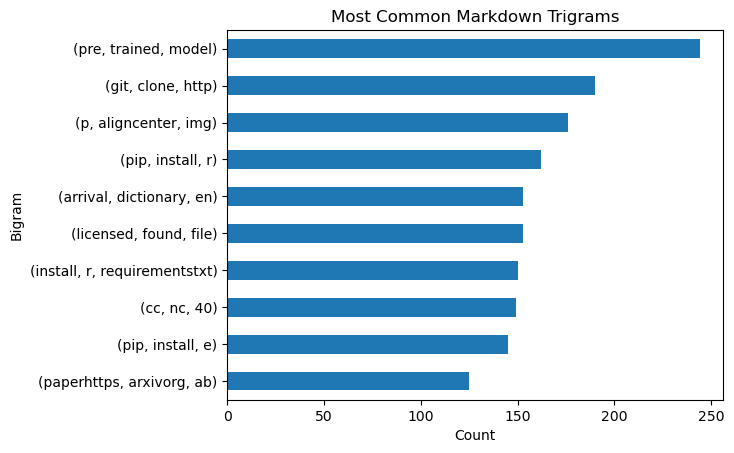

In [353]:
top_20_all_trigrams.head(10).plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most Common Trigrams')
plt.show()

top_20_all_trigrams.head(10).plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most Common Python Trigrams')
plt.show()

top_20_all_trigrams.head(10).plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most Common C++ Trigrams')
plt.show()

top_20_all_trigrams.head(10).plot.barh().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.title('Most Common Markdown Trigrams')
plt.show()

## Modeling

In [354]:
df.language.value_counts()

language
Python      653
Other       151
C++          37
Markdown     33
Name: count, dtype: Int64

In [355]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

X = df.lematized
y = df.language

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2)

tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

lm = LogisticRegression().fit(X_train, y_train)

train['predicted'] = lm.predict(X_train)
test['predicted'] = lm.predict(X_test)


In [356]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.predicted, test.actual))
print('---')
print(classification_report(test.actual, test.predicted))


Accuracy: 75.43%
---
Confusion Matrix
actual     C++       Markdown  Other     Python  
predicted                                        
Other             0         0         1         0
Python            7         7        29       131
---
              precision    recall  f1-score   support

         C++       0.00      0.00      0.00         7
    Markdown       0.00      0.00      0.00         7
       Other       1.00      0.03      0.06        30
      Python       0.75      1.00      0.86       131

    accuracy                           0.75       175
   macro avg       0.44      0.26      0.23       175
weighted avg       0.74      0.75      0.65       175



/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
X = df.lematized
y = df.language

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.2)

tfidf = TfidfVectorizer(ngram_range=(2,3))
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)

train = pd.DataFrame(dict(actual=y_train))
test = pd.DataFrame(dict(actual=y_test))

lm = LogisticRegression().fit(X_train, y_train)

train['predicted'] = lm.predict(X_train)
test['predicted'] = lm.predict(X_test)

In [ ]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.actual, test.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.predicted, test.actual))
print('---')
print(classification_report(test.actual, test.predicted))

Accuracy: 74.86%
---
Confusion Matrix
actual     C++       Markdown  Other     Python  
predicted                                        
Python            7         7        30       131
---
              precision    recall  f1-score   support

         C++       0.00      0.00      0.00         7
    Markdown       0.00      0.00      0.00         7
       Other       0.00      0.00      0.00        30
      Python       0.75      1.00      0.86       131

    accuracy                           0.75       175
   macro avg       0.19      0.25      0.21       175
weighted avg       0.56      0.75      0.64       175



/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
